I agree with Pim. I would go for a larger probe: 0.4 nm like Pim suggested or at least 0.26 nm, the latter being the radius of a regular Martini bead ( 2**(1./6)*0.47/2 ~ 0.26 nm, where 0.47 is the Lennard-Jones sigma of regular Martini interactions). Any probe in this 0.26-0.4 nm range should do: from my experience, relative differences will be the same across different probe sizes, *as long as* you compare SASA values obtained with the same probe size.

http://cgmartini.nl/index.php/component/kunena/10-other/5716-solvent-accessible-surface-area-on-martini-trajectories

In [1]:
%%bash
source /usr/local/gromacs/bin/GMXRC

# GROUP 1 is the Protein
####################### SASA 4ZW9
for item in baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm
do
    # RSMD
    for i in 1 2 3
    do
    printf "1" | gmx sasa -s 4zw9/${item}/rep${i}/step7_production_rep${i}.tpr \
                -f 4zw9/${item}/rep${i}/step7_production_rep${i}.xtc \
                -n 4zw9/baseline/index.bb.ndx\
                -dt 1000 \
                -o sasa/4zw9_${item}_rep${i}.xvg \
                -probe 0.26 2> log.txt
    done
done

####################### SASA 5EQI
for item in baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm
do
    # RSMD
    for i in 1 2 3
    do
     printf "1" | gmx sasa -s 5eqi/${item}/rep${i}/step7_production_rep${i}.tpr \
                -f 5eqi/${item}/rep${i}/step7_production_rep${i}.xtc \
                -n 5eqi/baseline/index.bb.ndx\
                -o sasa/5eqi_${item}_rep${i}.xvg \
                -probe 0.26 2> log.txt
    done
done


         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx sasa uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
A. Bondi
van der Waals Volumes and Radii
J. Phys. Chem. 68 (1964) pp. 441-451
-------- -------- --- Thank You --- -------- --------




         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx sasa uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
A. Bondi
van der Waals Volumes and Radii
J. Phys. Chem. 68 (1964) pp. 441-451
-------- -------- --- Thank You --- -------- --------


         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
       

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm no_rubber".split(" ")
label_names = ["Baseline", "No threshold", "Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.025 nm" , "Threshold: 0.01 nm"]

df = pd.DataFrame()
for protein in ["4zw9"]:
    for threshold in dir_names:
        for i in range(3):
            path = f"sasa/{protein}_{threshold}_rep{i+1}.xvg"
            if not os.path.isfile(path):
                continue

            x, y = np.loadtxt(path,comments=["@", "#"],unpack=True)
            res = pd.DataFrame({
                "time" : x,
                "sasa" : y,
                "replicate" : f"rep {i+1}",
                "protein"   : protein,
                "threshold" : threshold,
            })
            df = pd.concat([df, res])
df


,time,sasa,replicate,protein,threshold
0,0.0,184.161,rep 1,4zw9,baseline
1,1000.0,178.278,rep 1,4zw9,baseline
2,2000.0,181.262,rep 1,4zw9,baseline
3,3000.0,179.024,rep 1,4zw9,baseline
4,4000.0,181.708,rep 1,4zw9,baseline
...,...,...,...,...,...
1996,1996000.0,161.872,rep 3,4zw9,0.01nm
1997,1997000.0,172.304,rep 3,4zw9,0.01nm
1998,1998000.0,167.009,rep 3,4zw9,0.01nm
1999,1999000.0,163.659,rep 3,4zw9,0.01nm


<Axes: xlabel='threshold', ylabel='sasa'>

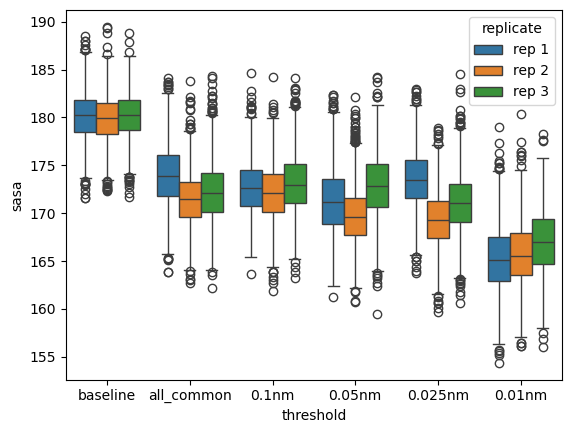

In [3]:
sns.boxplot(data=df[df["protein"] == "4zw9"], x="threshold", y="sasa", hue="replicate")
